In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tweets = pd.read_csv('datasets/tweets.csv')
users = pd.read_csv('datasets/users.csv')

with open('without_values_or_another_language.txt') as drop_users:
    drop_no_values = []
    drop_another_lang = []
    for i in drop_users.readlines():
        splited = i.split(',')
        if splited[1].strip() == 'no tweets':
            drop_no_values.append(int(splited[0]))
        else:
            drop_another_lang.append(int(splited[0]))

In [3]:
users

,id,screen_name,followers_count,created_at,protected,verified,statuses_count,friends_count
0,98714923,MzVenomous,2,2009-12-22 20:38:48+00:00,False,False,81,22
1,74157087,amaraux,0,2009-09-14 13:34:40+00:00,False,False,1,0
2,67495384,loverenanthuco,13,2009-08-21 02:15:46+00:00,False,False,219,21
3,64221267,Gugel1983,9,2009-08-09 18:15:26+00:00,False,False,42,4
4,35801430,Jamie_Hanbury,3,2009-04-27 17:30:19+00:00,False,False,0,0
...,...,...,...,...,...,...,...,...
40782,33017170,BigBallas,2,2009-04-18 21:24:02+00:00,False,False,17,5
40783,29887925,bigboyinbama,2,2009-04-09 01:49:41+00:00,False,False,1,1
40784,83181650,PC_PS3_GameTips,43,2009-10-17 17:43:06+00:00,False,False,12,0
40785,45523007,RainaVerina,561,2009-06-08 07:56:56+00:00,False,False,59217,341


In [4]:
tweets.isna().sum()

id                 0
screen_name        0
text_id            0
text               1
retweet_count      0
reply_count        0
like_count         0
quote_count        0
lang             562
type               0
created_at         0
dtype: int64

In [5]:
tweets.loc[289837]

id                                46113752
screen_name                     nzgrossman
text_id                 249881484096323584
text                    Gmar chatima tova!
retweet_count                            0
reply_count                              0
like_count                               0
quote_count                              0
lang                                   NaN
type                                 tweet
created_at       2012-09-23 14:42:43+00:00
Name: 289837, dtype: object

In [6]:
# drop because we have not english in common here
tweets = tweets.dropna()

In [7]:
tweets

,id,screen_name,text_id,text,retweet_count,reply_count,like_count,quote_count,lang,type,created_at
0,98714923,MzVenomous,114896674840788993,I made $486 today working a few hour from home...,0,0,0,0,en,tweet,2011-09-17 03:01:16+00:00
1,98714923,MzVenomous,11452801950,#dontyouhatewhen you look for somethin for a l...,0,0,0,0,en,tweet,2010-04-02 00:33:27+00:00
2,98714923,MzVenomous,11449988432,OVER! Missy would not allow that! No 1 minute ...,0,0,0,0,en,tweet,2010-04-01 23:23:59+00:00
3,98714923,MzVenomous,11449010476,RT PlayTime is definitely.........OVER!,0,0,0,0,en,tweet,2010-04-01 22:59:21+00:00
4,98714923,MzVenomous,11393686207,"Not gonna lie, hated #MASSIVEATTACK the first ...",0,0,0,0,en,tweet,2010-03-31 23:47:06+00:00
...,...,...,...,...,...,...,...,...,...,...,...
291220,83181650,PC_PS3_GameTips,4948590037,Play GW? Hate Spamming WTB? Here is the best o...,0,0,0,0,en,tweet,2009-10-17 19:04:54+00:00
291221,83181650,PC_PS3_GameTips,4948533269,Arggh misstyping with these sticky keyboard ke...,0,0,0,0,en,tweet,2009-10-17 19:02:14+00:00
291222,83181650,PC_PS3_GameTips,4948342618,Online Games I play ATM:- GW-All expansions. C...,0,0,0,0,en,tweet,2009-10-17 18:52:57+00:00
291223,83181650,PC_PS3_GameTips,4948173804,"My Tweets will mostly be about gaming, giing a...",0,0,0,0,en,tweet,2009-10-17 18:44:52+00:00


In [8]:
tweets = tweets[tweets['type'] != 'retweeted']

In [9]:
tweets

,id,screen_name,text_id,text,retweet_count,reply_count,like_count,quote_count,lang,type,created_at
0,98714923,MzVenomous,114896674840788993,I made $486 today working a few hour from home...,0,0,0,0,en,tweet,2011-09-17 03:01:16+00:00
1,98714923,MzVenomous,11452801950,#dontyouhatewhen you look for somethin for a l...,0,0,0,0,en,tweet,2010-04-02 00:33:27+00:00
2,98714923,MzVenomous,11449988432,OVER! Missy would not allow that! No 1 minute ...,0,0,0,0,en,tweet,2010-04-01 23:23:59+00:00
3,98714923,MzVenomous,11449010476,RT PlayTime is definitely.........OVER!,0,0,0,0,en,tweet,2010-04-01 22:59:21+00:00
4,98714923,MzVenomous,11393686207,"Not gonna lie, hated #MASSIVEATTACK the first ...",0,0,0,0,en,tweet,2010-03-31 23:47:06+00:00
...,...,...,...,...,...,...,...,...,...,...,...
291220,83181650,PC_PS3_GameTips,4948590037,Play GW? Hate Spamming WTB? Here is the best o...,0,0,0,0,en,tweet,2009-10-17 19:04:54+00:00
291221,83181650,PC_PS3_GameTips,4948533269,Arggh misstyping with these sticky keyboard ke...,0,0,0,0,en,tweet,2009-10-17 19:02:14+00:00
291222,83181650,PC_PS3_GameTips,4948342618,Online Games I play ATM:- GW-All expansions. C...,0,0,0,0,en,tweet,2009-10-17 18:52:57+00:00
291223,83181650,PC_PS3_GameTips,4948173804,"My Tweets will mostly be about gaming, giing a...",0,0,0,0,en,tweet,2009-10-17 18:44:52+00:00


In [10]:
users_with_tweets = users[(~users['id'].isin(drop_no_values)) & (~users['id'].isin(drop_another_lang))].copy()

In [11]:
users_with_tweets.drop(['protected', 'screen_name'], axis=1, inplace=True)

In [12]:
users_with_tweets

,id,followers_count,created_at,verified,statuses_count,friends_count
0,98714923,2,2009-12-22 20:38:48+00:00,False,81,22
1,74157087,0,2009-09-14 13:34:40+00:00,False,1,0
3,64221267,9,2009-08-09 18:15:26+00:00,False,42,4
11,29777129,4,2009-04-08 18:05:53+00:00,False,4,0
12,76784410,638,2009-09-23 22:58:52+00:00,False,870,399
...,...,...,...,...,...,...
40777,40882510,323,2009-05-18 14:23:47+00:00,False,3818,280
40780,46489315,194,2009-06-11 20:58:25+00:00,False,4780,64
40781,57025165,0,2009-07-15 14:06:58+00:00,False,2,2
40783,29887925,2,2009-04-09 01:49:41+00:00,False,1,1


In [13]:
users_with_tweets['id'].unique()

array([98714923, 74157087, 64221267, ..., 57025165, 29887925, 83181650])

In [14]:
data = pd.merge(tweets, users_with_tweets, how='left', on='id')

In [15]:
data = data.rename({'created_at_x':'post_created_at', 'created_at_y':'acc_created_at'}, axis=1)
data.drop('screen_name', axis=1, inplace=True)

In [16]:
data

,id,text_id,text,retweet_count,reply_count,like_count,quote_count,lang,type,post_created_at,followers_count,acc_created_at,verified,statuses_count,friends_count
0,98714923,114896674840788993,I made $486 today working a few hour from home...,0,0,0,0,en,tweet,2011-09-17 03:01:16+00:00,2,2009-12-22 20:38:48+00:00,False,81,22
1,98714923,11452801950,#dontyouhatewhen you look for somethin for a l...,0,0,0,0,en,tweet,2010-04-02 00:33:27+00:00,2,2009-12-22 20:38:48+00:00,False,81,22
2,98714923,11449988432,OVER! Missy would not allow that! No 1 minute ...,0,0,0,0,en,tweet,2010-04-01 23:23:59+00:00,2,2009-12-22 20:38:48+00:00,False,81,22
3,98714923,11449010476,RT PlayTime is definitely.........OVER!,0,0,0,0,en,tweet,2010-04-01 22:59:21+00:00,2,2009-12-22 20:38:48+00:00,False,81,22
4,98714923,11393686207,"Not gonna lie, hated #MASSIVEATTACK the first ...",0,0,0,0,en,tweet,2010-03-31 23:47:06+00:00,2,2009-12-22 20:38:48+00:00,False,81,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290652,83181650,4948590037,Play GW? Hate Spamming WTB? Here is the best o...,0,0,0,0,en,tweet,2009-10-17 19:04:54+00:00,43,2009-10-17 17:43:06+00:00,False,12,0
290653,83181650,4948533269,Arggh misstyping with these sticky keyboard ke...,0,0,0,0,en,tweet,2009-10-17 19:02:14+00:00,43,2009-10-17 17:43:06+00:00,False,12,0
290654,83181650,4948342618,Online Games I play ATM:- GW-All expansions. C...,0,0,0,0,en,tweet,2009-10-17 18:52:57+00:00,43,2009-10-17 17:43:06+00:00,False,12,0
290655,83181650,4948173804,"My Tweets will mostly be about gaming, giing a...",0,0,0,0,en,tweet,2009-10-17 18:44:52+00:00,43,2009-10-17 17:43:06+00:00,False,12,0


In [17]:
data['info_tweet'] = data['retweet_count']+data['quote_count']+data['like_count']+data['reply_count']

In [18]:
data

,id,text_id,text,retweet_count,reply_count,like_count,quote_count,lang,type,post_created_at,followers_count,acc_created_at,verified,statuses_count,friends_count,info_tweet
0,98714923,114896674840788993,I made $486 today working a few hour from home...,0,0,0,0,en,tweet,2011-09-17 03:01:16+00:00,2,2009-12-22 20:38:48+00:00,False,81,22,0
1,98714923,11452801950,#dontyouhatewhen you look for somethin for a l...,0,0,0,0,en,tweet,2010-04-02 00:33:27+00:00,2,2009-12-22 20:38:48+00:00,False,81,22,0
2,98714923,11449988432,OVER! Missy would not allow that! No 1 minute ...,0,0,0,0,en,tweet,2010-04-01 23:23:59+00:00,2,2009-12-22 20:38:48+00:00,False,81,22,0
3,98714923,11449010476,RT PlayTime is definitely.........OVER!,0,0,0,0,en,tweet,2010-04-01 22:59:21+00:00,2,2009-12-22 20:38:48+00:00,False,81,22,0
4,98714923,11393686207,"Not gonna lie, hated #MASSIVEATTACK the first ...",0,0,0,0,en,tweet,2010-03-31 23:47:06+00:00,2,2009-12-22 20:38:48+00:00,False,81,22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290652,83181650,4948590037,Play GW? Hate Spamming WTB? Here is the best o...,0,0,0,0,en,tweet,2009-10-17 19:04:54+00:00,43,2009-10-17 17:43:06+00:00,False,12,0,0
290653,83181650,4948533269,Arggh misstyping with these sticky keyboard ke...,0,0,0,0,en,tweet,2009-10-17 19:02:14+00:00,43,2009-10-17 17:43:06+00:00,False,12,0,0
290654,83181650,4948342618,Online Games I play ATM:- GW-All expansions. C...,0,0,0,0,en,tweet,2009-10-17 18:52:57+00:00,43,2009-10-17 17:43:06+00:00,False,12,0,0
290655,83181650,4948173804,"My Tweets will mostly be about gaming, giing a...",0,0,0,0,en,tweet,2009-10-17 18:44:52+00:00,43,2009-10-17 17:43:06+00:00,False,12,0,0


In [19]:
data['acc_created_at'] = data['acc_created_at'].apply(lambda x: x[:4]).astype('int32')
data[data['info_tweet'] != 0]

,id,text_id,text,retweet_count,reply_count,like_count,quote_count,lang,type,post_created_at,followers_count,acc_created_at,verified,statuses_count,friends_count,info_tweet
84,76784410,1547950556127174656,Great help in having you! Always welcome back ...,0,0,5,0,en,quoted,2022-07-15 14:25:46+00:00,638,2009,False,870,399,5
85,76784410,1546213499843616768,Went out for a walk searching for a dropped GP...,5,5,87,1,en,tweet,2022-07-10 19:23:20+00:00,638,2009,False,870,399,98
86,76784410,1544594490899447808,After multiple rounds the last two weeks @juli...,2,0,35,2,en,tweet,2022-07-06 08:09:58+00:00,638,2009,False,870,399,39
87,76784410,1540643129598136320,Very low predation in my field site this year ...,6,0,155,0,en,tweet,2022-06-25 10:28:40+00:00,638,2009,False,870,399,161
88,76784410,1537478996996366341,Julia is a great addion to our team this summe...,0,0,8,0,en,quoted,2022-06-16 16:55:32+00:00,638,2009,False,870,399,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290634,46489315,408782021184331776,"If you're a bird, I'm a bird. 😍🐦",0,0,1,0,en,tweet,2013-12-06 02:16:43+00:00,194,2009,False,4780,64,1
290636,46489315,408436970637910016,"Crazy, stupid, love. This movie, oh my goodnes...",0,0,2,0,en,tweet,2013-12-05 03:25:36+00:00,194,2009,False,4780,64,2
290637,46489315,408404564371451904,Luke's first Christmas ornament!!! http://t.co...,0,0,2,0,en,tweet,2013-12-05 01:16:50+00:00,194,2009,False,4780,64,2
290638,46489315,407683250367119360,"Hey twitter, it's been awhile! Guess I'm back ...",0,1,3,0,en,tweet,2013-12-03 01:30:35+00:00,194,2009,False,4780,64,4


In [20]:
# data.to_csv('datasets/data.csv', index=False)

In [21]:
# np.linspace(1, data[data['id'] != 27195114]['followers_count'].max(), 4)
data['followers_count'].quantile(0.75)
data['followers_count'].quantile(0.5)

53.0

In [22]:
def whats_group(x, groups):
    if x == 0:
        return 'Zero'
    elif x > groups[0] and x < groups[1]:
        return 'Low'
    elif x > groups[1] and x < groups[2]:
        return 'Middle'
    else:
        return 'Many'

followers_groups = [1, 1000, 100000]
data['followers_group'] = data['followers_count'].apply(lambda x: whats_group(x, followers_groups))

/home/danilo/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='followers_group'>

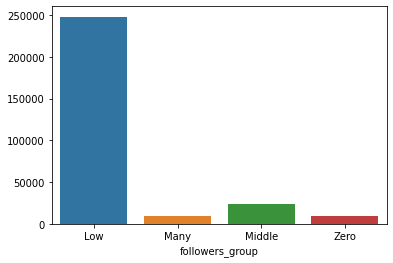

In [23]:
sns.barplot(data.groupby('followers_group').count()['id'].index,\
            data.groupby('followers_group').count()['id'].values)

In [24]:
data.corr()

,id,text_id,retweet_count,reply_count,like_count,quote_count,followers_count,acc_created_at,verified,statuses_count,friends_count,info_tweet
id,1.000000,-0.123443,-0.005084,-0.009556,-0.007242,-0.005845,-0.011237,0.449754,-0.031837,-0.048115,-0.067641,-0.006919
text_id,-0.123443,1.000000,0.006268,0.019695,0.012459,0.009622,0.018368,-0.082801,0.127181,0.299724,0.253208,0.011337
retweet_count,-0.005084,0.006268,1.000000,0.691218,0.876147,0.789560,0.424908,0.001110,0.058769,0.000758,0.001035,0.926283
reply_count,-0.009556,0.019695,0.691218,1.000000,0.835739,0.828600,0.765584,0.000319,0.117521,0.006468,0.004369,0.827255
like_count,-0.007242,0.012459,0.876147,0.835739,1.000000,0.936788,0.614742,0.000840,0.093344,0.002637,0.002267,0.993024
quote_count,-0.005845,0.009622,0.789560,0.828600,0.936788,1.000000,0.589308,0.001835,0.080470,0.000963,0.001556,0.927186
followers_count,-0.011237,0.018368,0.424908,0.765584,0.614742,0.589308,1.000000,0.000805,0.159673,0.011100,0.005506,0.587621
acc_created_at,0.449754,-0.082801,0.001110,0.000319,0.000840,0.001835,0.000805,1.000000,-0.018522,-0.033452,-0.046380,0.000952
verified,-0.031837,0.127181,0.058769,0.117521,0.093344,0.080470,0.159673,-0.018522,1.000000,0.116108,0.078796,0.087536
statuses_count,-0.048115,0.299724,0.000758,0.006468,0.002637,0.000963,0.011100,-0.033452,0.116108,1.000000,0.273832,0.002271


In [25]:
data.drop(['acc_created_at', 'verified'], axis=1, inplace=True)

In [52]:
# data.to_csv('datasets/data.csv', index=False)

In [26]:
data

,id,text_id,text,retweet_count,reply_count,like_count,quote_count,lang,type,post_created_at,followers_count,statuses_count,friends_count,info_tweet,followers_group
0,98714923,114896674840788993,I made $486 today working a few hour from home...,0,0,0,0,en,tweet,2011-09-17 03:01:16+00:00,2,81,22,0,Low
1,98714923,11452801950,#dontyouhatewhen you look for somethin for a l...,0,0,0,0,en,tweet,2010-04-02 00:33:27+00:00,2,81,22,0,Low
2,98714923,11449988432,OVER! Missy would not allow that! No 1 minute ...,0,0,0,0,en,tweet,2010-04-01 23:23:59+00:00,2,81,22,0,Low
3,98714923,11449010476,RT PlayTime is definitely.........OVER!,0,0,0,0,en,tweet,2010-04-01 22:59:21+00:00,2,81,22,0,Low
4,98714923,11393686207,"Not gonna lie, hated #MASSIVEATTACK the first ...",0,0,0,0,en,tweet,2010-03-31 23:47:06+00:00,2,81,22,0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290652,83181650,4948590037,Play GW? Hate Spamming WTB? Here is the best o...,0,0,0,0,en,tweet,2009-10-17 19:04:54+00:00,43,12,0,0,Low
290653,83181650,4948533269,Arggh misstyping with these sticky keyboard ke...,0,0,0,0,en,tweet,2009-10-17 19:02:14+00:00,43,12,0,0,Low
290654,83181650,4948342618,Online Games I play ATM:- GW-All expansions. C...,0,0,0,0,en,tweet,2009-10-17 18:52:57+00:00,43,12,0,0,Low
290655,83181650,4948173804,"My Tweets will mostly be about gaming, giing a...",0,0,0,0,en,tweet,2009-10-17 18:44:52+00:00,43,12,0,0,Low
